In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df_i = pd.read_csv('results_i.csv')
df_s = pd.read_csv('results_s.csv')

In [43]:
df_Am = df_s[(df_s['num_s'] == df_s['num_s'].max()) & (df_s['s_method'] == 'OS')]
Am = df_Am['area'].mean()

df_i['abs_diff'] = abs(Am - df_i['area'])
df_s['abs_diff'] = abs(Am - df_s['area'])

Am

1.5289086419753084

In [44]:
print(df_i.head())
print(df_s.head())

   iteration  area  repetition s_method  abs_diff
0          6  2.52           1       MC  0.991091
1          7  2.76           1       MC  1.231091
2          8  2.32           1       MC  0.791091
3          9  2.36           1       MC  0.831091
4         10  2.24           1       MC  0.711091
   num_s      area  repetition s_method  abs_diff
0    100  1.760000           1       MC  0.231091
1    121  0.793388           1       MC  0.735520
2    144  1.555556           1       MC  0.026647
3    169  1.893491           1       MC  0.364582
4    196  1.224490           1       MC  0.304419


In [45]:
df_i_MC = df_i[(df_i.s_method == 'MC') | (df_i.s_method == 'MC_c')]
df_s_MC = df_s[(df_s.s_method == 'MC') | (df_s.s_method == 'MC_c')]

In [46]:
df_i = df_i[df_i.s_method != 'MC_c']
df_s = df_s[df_s.s_method != 'MC_c']

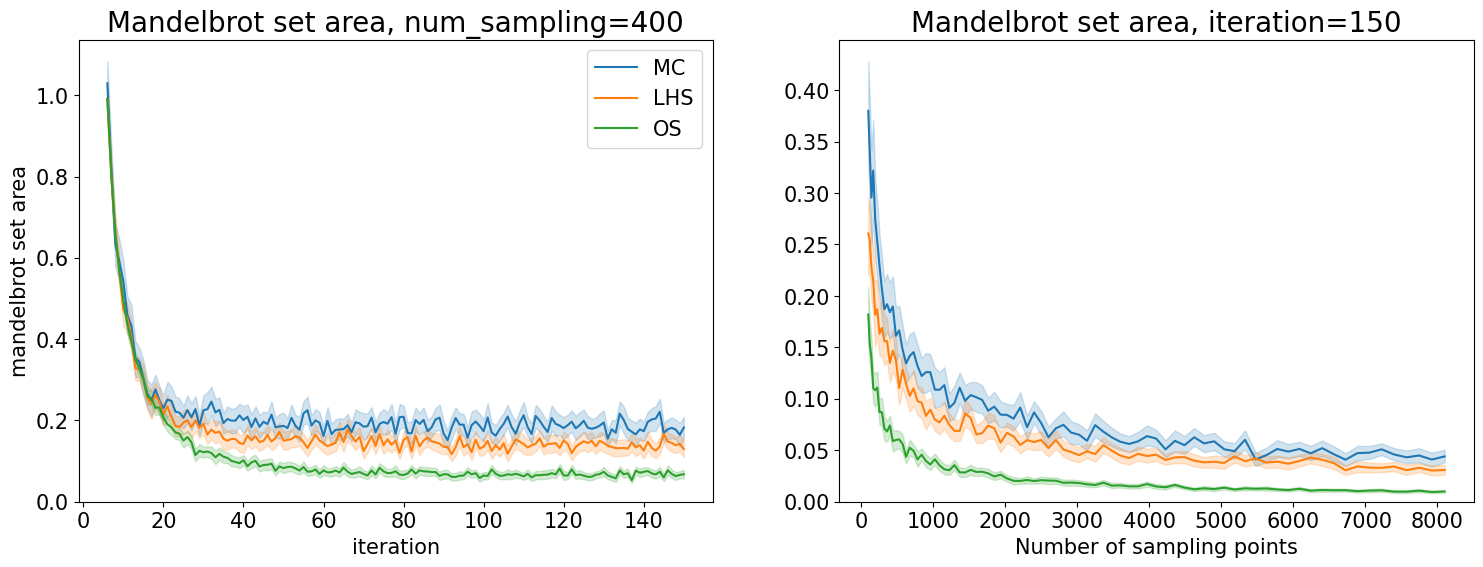

In [47]:
'''Without RuntimeWarning handling'''

plt.rcParams['figure.figsize'] = (18, 6)
fig1, ax1 = plt.subplots(1, 2)

sns.lineplot(data=df_i, x='iteration', y='abs_diff', hue='s_method', errorbar='ci', ax=ax1[0])
sns.lineplot(data=df_s, x='num_s', y='abs_diff', hue='s_method', errorbar='ci', ax=ax1[1])

# ax1[0].plot(np.arange(6, 151), np.repeat([Am], 145), 'k-.', label=r'$A_M$', zorder=6)
# ax1[1].plot(np.arange(0, 90**2), np.repeat([Am], 90**2), 'k-.', label=r'$A_M$', zorder=4)


ax1[0].set_title('Mandelbrot set area, num_sampling=400', fontsize=20)
ax1[0].set_ylim(bottom=0)
ax1[0].set_xlabel('iteration', fontsize=15)
ax1[0].set_ylabel('mandelbrot set area', fontsize=15)
ax1[0].tick_params(axis='both', which='major', labelsize=15)
ax1[0].legend(fontsize=15)

ax1[1].set_title('Mandelbrot set area, iteration=150', fontsize=20)
ax1[1].set_ylim(bottom=0)
ax1[1].set_xlabel('Number of sampling points', fontsize=15)
ax1[1].set_ylabel('')
ax1[1].tick_params(axis='both', which='major', labelsize=15)
ax1[1].get_legend().remove()

plt.show()

In [39]:
# '''
# Note the figure in this block is generated with RuntimeWarning handling,
# compared to the figure above, the average area is much larger.
# '''

# plt.rcParams['figure.figsize'] = (18, 6)
# fig1, ax1 = plt.subplots(1, 2)

# sns.lineplot(data=df_i, x='iteration', y='area', hue='s_method', errorbar='ci', ax=ax1[0])
# sns.lineplot(data=df_s, x='num_s', y='area', hue='s_method', errorbar='ci', ax=ax1[1])

# ax1[0].plot(np.arange(0, 61), np.repeat([Am], 61), 'k-.', label=r'$A_M$', zorder=6)
# ax1[1].plot(np.arange(0, 90**2), np.repeat([Am], 90**2), 'k-.', label=r'$A_M$', zorder=4)


# ax1[0].set_title('Mandelbrot set area, num_sampling=100', fontsize=20)
# ax1[0].set_xlabel('iteration', fontsize=15)
# ax1[0].set_ylabel('mandelbrot set area', fontsize=15)
# ax1[0].tick_params(axis='both', which='major', labelsize=15)
# ax1[0].legend(fontsize=15)

# ax1[1].set_title('Mandelbrot set area, iteration=100', fontsize=20)
# ax1[1].set_xlabel('Number of sampling points', fontsize=15)
# ax1[1].set_ylabel('')
# ax1[1].tick_params(axis='both', which='major', labelsize=15)
# ax1[1].get_legend().remove()

# plt.show()

In [183]:
fig1.savefig('i-s experiments.pdf', bbox_inches='tight')

### New sampling method

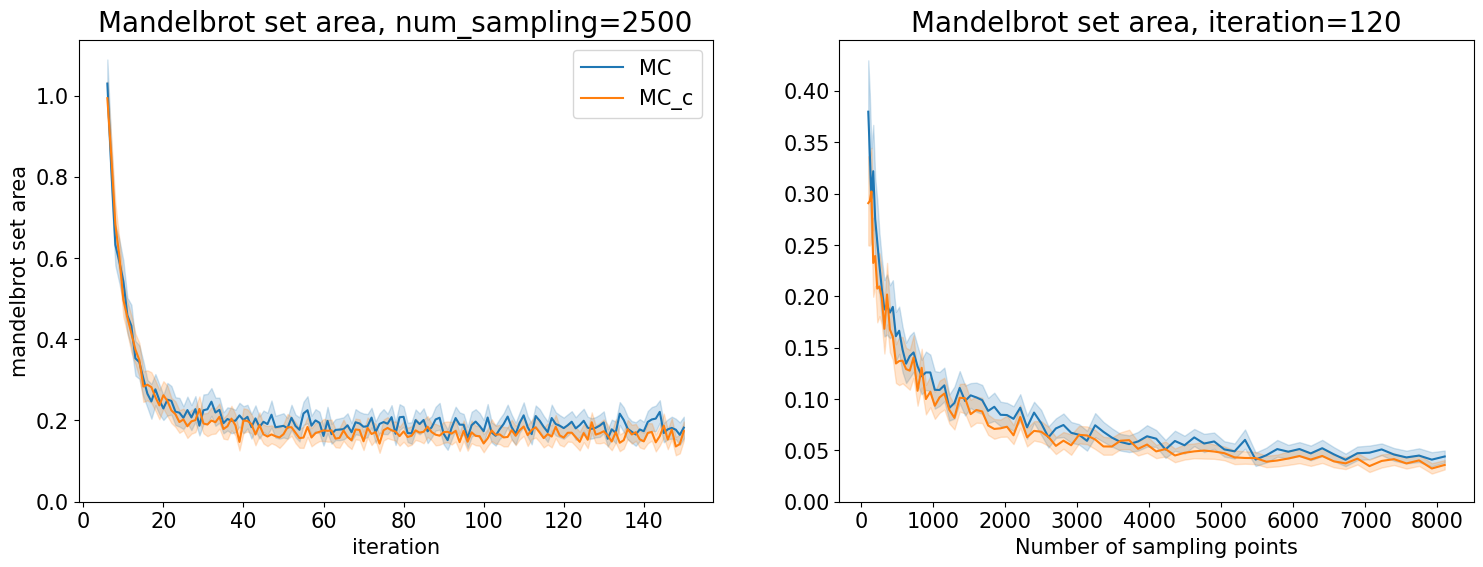

In [48]:
'''Without RuntimeWarning handling'''

plt.rcParams['figure.figsize'] = (18, 6)
fig2, ax2 = plt.subplots(1, 2)

sns.lineplot(data=df_i_MC, x='iteration', y='abs_diff', hue='s_method', errorbar='ci', ax=ax2[0])
sns.lineplot(data=df_s_MC, x='num_s', y='abs_diff', hue='s_method', errorbar='ci', ax=ax2[1])

# ax2[0].plot(np.arange(6, 121), np.repeat([1.506484], 115), 'k-.', label=r'$A_M$', zorder=6)
# ax2[1].plot(np.arange(0, 90**2), np.repeat([1.506484], 90**2), 'k-.', label=r'$A_M$', zorder=4)


ax2[0].set_title('Mandelbrot set area, num_sampling=2500', fontsize=20)
ax2[0].set_ylim(bottom=0)
ax2[0].set_xlabel('iteration', fontsize=15)
ax2[0].set_ylabel('mandelbrot set area', fontsize=15)
ax2[0].tick_params(axis='both', which='major', labelsize=15)
ax2[0].legend(fontsize=15)

ax2[1].set_title('Mandelbrot set area, iteration=120', fontsize=20)
ax2[1].set_ylim(bottom=0)
ax2[1].set_xlabel('Number of sampling points', fontsize=15)
ax2[1].set_ylabel('')
ax2[1].tick_params(axis='both', which='major', labelsize=15)
ax2[1].get_legend().remove()

plt.show()